In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
import seaborn as sns

In [2]:
# Wczytanie danych
df = pd.read_csv('danemapa.csv', sep=';')

In [3]:
df

,Year,Revenue,Sale of goods,Licence income,Americas,"Europe, Middle East & Africa",Asia & Pacific
0,2022,64.647,63.866,0.781,28.079,25.301,10.486
1,2021,55.294,54.844,0.450,22.031,22.906,9.907
2,2020,43.656,43.262,0.394,16.345,19.060,7.857
3,2019,38.544,38.093,0.451,14.328,17.089,6.676
4,2018,36.391,35.882,0.509,13.769,16.644,5.469
5,2017,34.995,34.383,0.612,13.357,15.898,5.028


In [4]:
pip install --upgrade Basemap

  Obtaining dependency information for Basemap from https://files.pythonhosted.org/packages/36/91/c3bf3ef6eacdb7cae204f3b440b7810ecbb30a4067457310d2544c6a5b14/basemap-1.4.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 507.3/507.3 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: Basemap
    Found existing installation: basemap 1.3.8
    Uninstalling basemap-1.3.8:
      Successfully uninstalled basemap-1.3.8
Note: you may need to restart the kernel to use updated packages.


In [5]:
from mpl_toolkits.basemap import Basemap

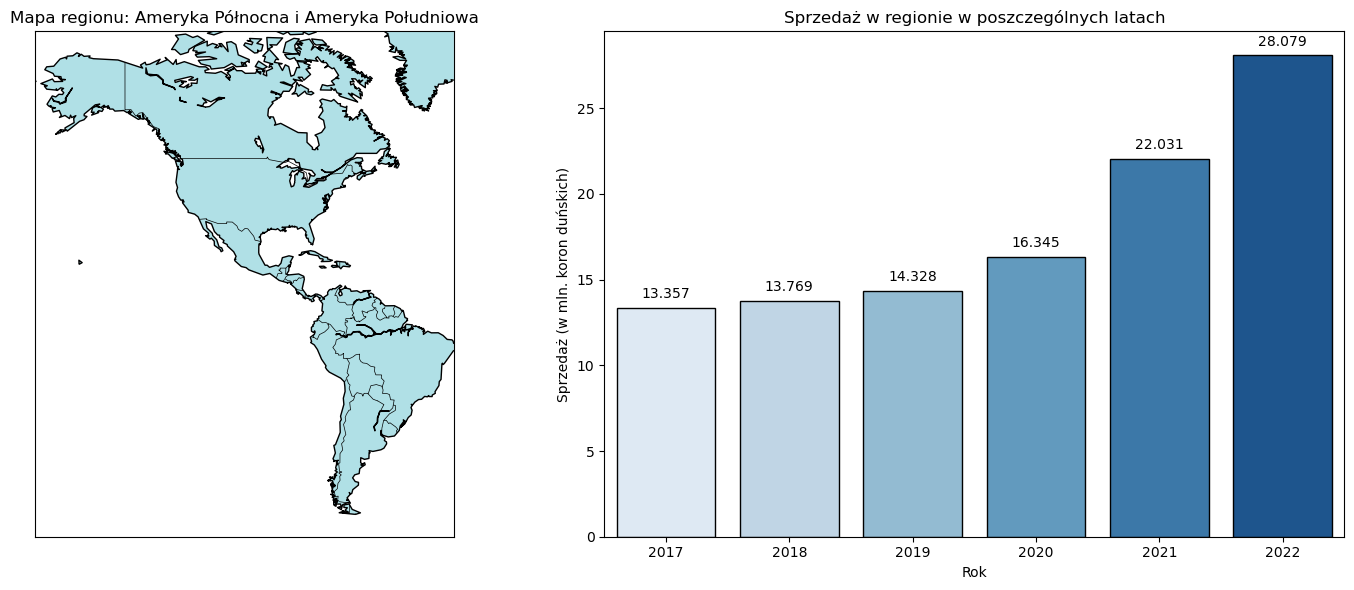

In [6]:
# Stworzenie wykresu oraz subplotów w układzie kolumnowym
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Wykres 1: Mapa Ameryki Północnej oraz Ameryki Południowej
ax1 = axes[0]

# Tworzenie mapy
# projection='mill' - Projekcja równikowa Miller'a, czyli zmodyfikowane odwzorowanie Mercatora
# llcrnrlat=-60, urcrnrlat=75, llcrnrlon=-170, urcrnrlon=-35 -
#      Określa zakres szerokości geograficznej (latitude) i długości geograficznej (longitude), które będą widoczne na mapie.
#      W tym przypadku od -60 do 75 stopni szerokości i od -170 do -35 stopni długości.
# resolution='c' - Określa rozdzielczość mapy. c - średnia
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=75,llcrnrlon=-170,urcrnrlon=-35,resolution='c', ax=ax1)

# Rysowanie linii wybrzeża, granice krajów oraz wypełnienie kontynentów kolorem
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='powderblue')

# Wykres 2: Wykres słupkowy przedstawiający sprzedaż towarów w latach 2016-2022 w regionie
ax2 = axes[1]

# Tworzenie wykresu słupkowego
bar_plot = sns.barplot(x='Year', y='Americas', data=df, ax=ax2, palette="Blues", ci=None, edgecolor='black')

# Dodanie tekstu nad każdym słupkiem z ilością sprzedaży
# Pętla iteruje przez każdy słupkowy element tzw. "patch" przy zmiennej p
# f'{p.get_height()}' - tekst etykiety danego słupka, który sie pojawi. 
# (p.get_x() + p.get_width() / 2., p.get_height()) - są to współrzędne gdzie ma sie pojawić etykieta
#   - współrzędna x-owa to połowa szerokości słupka, czyli jego środek
#   - współrzędna y-owa to wysokość słupka
# ha='center', va='center' - pozycja horyzontalna i pionowa. Ustawiamy "center" aby tekst był na środku
# textcoords='offset points' - określenie, że "xytext" są przysunięciem puntków
# xytext=(0, 10) - określenie przysunięcia etykiety od punktu anotacji, czyli o 10 punktów w góre
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center',
                       textcoords = 'offset points',
                       xytext = (0, 10))

ax2.set_ylabel('Sprzedaż (w mln. koron duńskich)')
ax2.set_xlabel('Rok')

# Tytuły wykresów
ax1.set_title('Mapa regionu: Ameryka Północna i Ameryka Południowa')
ax2.set_title('Sprzedaż w regionie w poszczególnych latach')

# Dostowanie układu dla odpowiedniego rozłożenia etykiet i tytułów
plt.tight_layout()

plt.savefig('Sprzedaż w Ameryce.pdf')

plt.show()


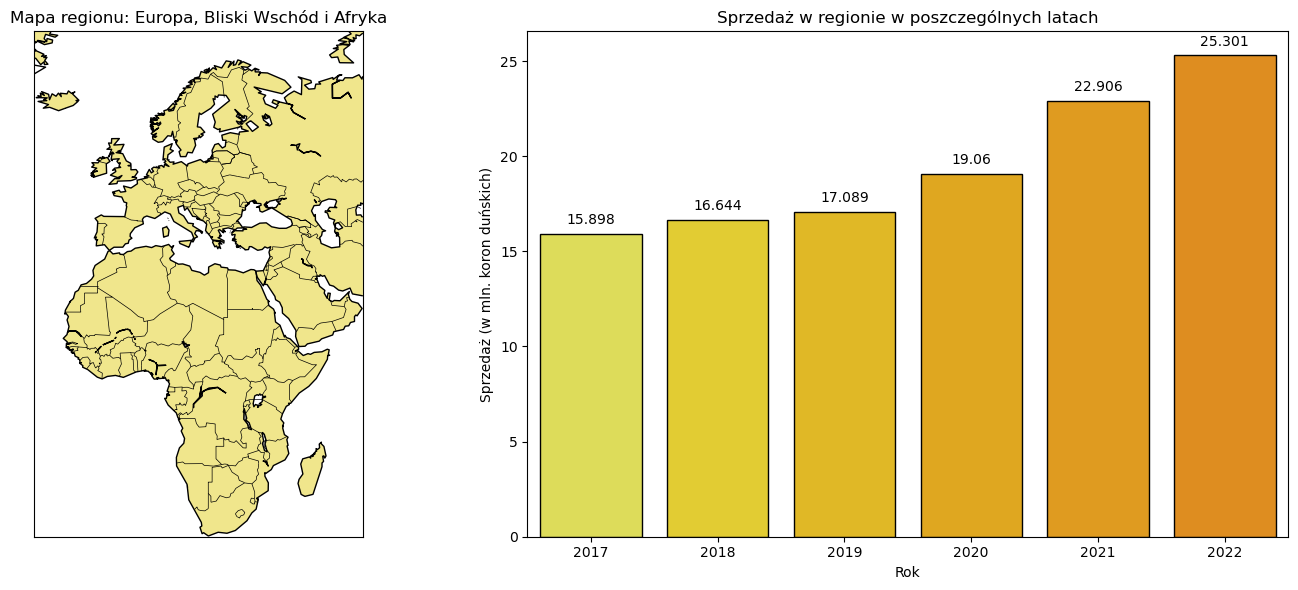

In [7]:
# Stworzenie wykresu oraz subplotów w układzie kolumnowym
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Wykres 1: Mapa Europy, Bliskiego Wschodu oraz Afryki
ax1 = axes[0]

# Tworzenie mapy
# projection='mill' - Projekcja równikowa Miller'a, czyli zmodyfikowane odwzorowanie Mercatora
# llcrnrlat=-35, urcrnrlat=75, llcrnrlon=-25, urcrnrlon=60 -
#      Określa zakres szerokości geograficznej (latitude) i długości geograficznej (longitude), które będą widoczne na mapie.
#      W tym przypadku od -35 do 75 stopni szerokości i od -25 do 60 stopni długości.
# resolution='c' - Określa rozdzielczość mapy. c - średnia
m = Basemap(projection='mill',llcrnrlat=-35,urcrnrlat=75,llcrnrlon=-25,urcrnrlon=60,resolution='c', ax=ax1)

# Rysowanie linii wybrzeża, granice krajów oraz wypełnienie kontynentów kolorem
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='khaki')

# Wykres 2: Wykres słupkowy przedstawiający sprzedaż towarów w latach 2016-2022 w regionie
ax2 = axes[1]

bar_plot = sns.barplot(x='Year', y='Europe, Middle East & Africa', data=df, ax=ax2, palette="Wistia", ci=None, edgecolor='black')

# Dodanie tekstu nad każdym słupkiem z ilością sprzedaży
# Pętla iteruje przez każdy słupkowy element tzw. "patch" przy zmiennej p
# f'{p.get_height()}' - tekst etykiety danego słupka, który sie pojawi. 
# (p.get_x() + p.get_width() / 2., p.get_height()) - są to współrzędne gdzie ma sie pojawić etykieta
#   - współrzędna x-owa to połowa szerokości słupka, czyli jego środek
#   - współrzędna y-owa to wysokość słupka
# ha='center', va='center' - pozycja horyzontalna i pionowa. Ustawiamy "center" aby tekst był na środku
# textcoords='offset points' - określenie, że "xytext" są przysunięciem puntków
# xytext=(0, 10) - określenie przysunięcia etykiety od punktu anotacji, czyli o 10 punktów w góre
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', textcoords='offset points',
                       xytext=(0, 10))

ax2.set_ylabel('Sprzedaż (w mln. koron duńskich)')
ax2.set_xlabel('Rok')

# Tytuły wykresów
ax1.set_title('Mapa regionu: Europa, Bliski Wschód i Afryka')
ax2.set_title('Sprzedaż w regionie w poszczególnych latach')

# Dostowanie układu dla odpowiedniego rozłożenia etykiet i tytułów
plt.tight_layout()

plt.savefig('Sprzedaż w Europie i Afryce.pdf')

plt.show()


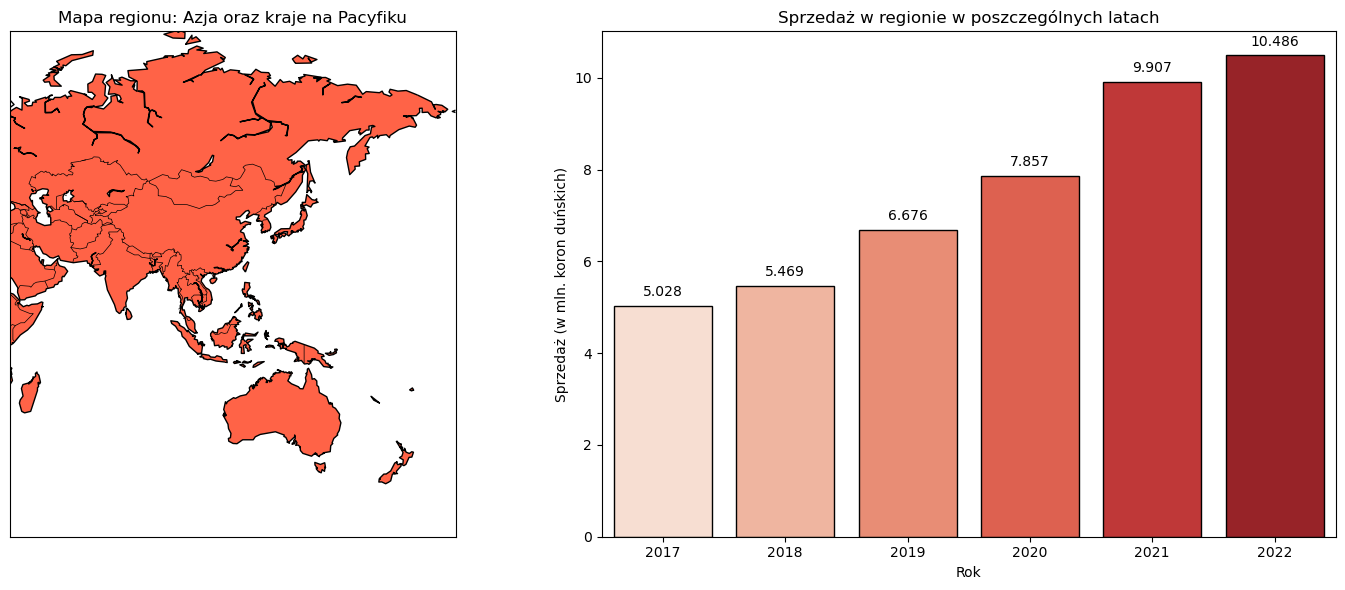

In [8]:
# Stworzenie wykresu oraz subplotów w układzie kolumnowym
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Wykres 1: Mapa Azji oraz Pacyfiku
ax1 = axes[0]

# Tworzenie mapy
# projection='mill' - Projekcja równikowa Miller'a, czyli zmodyfikowane odwzorowanie Mercatora
# llcrnrlat=-60, urcrnrlat=80, llcrnrlon=40, urcrnrlon=193 -
#      Określa zakres szerokości geograficznej (latitude) i długości geograficznej (longitude), które będą widoczne na mapie.
#      W tym przypadku od -60 do 80 stopni szerokości i od 40 do 193 stopni długości.
# resolution='c' - Określa rozdzielczość mapy. c - średnia
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=40, urcrnrlon=193, resolution='c', ax=ax1)

# Rysowanie linii wybrzeża, granice krajów oraz wypełnienie kontynentów kolorem
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='tomato')

# Wykres 2: Wykres słupkowy przedstawiający sprzedaż towarów w latach 2016-2022 w regionie
ax2 = axes[1]

bar_plot = sns.barplot(x='Year', y='Asia & Pacific', data=df, ax=ax2, palette="Reds", ci=None, edgecolor='black')

# Dodanie tekstu nad każdym słupkiem z ilością sprzedaży
# Pętla iteruje przez każdy słupkowy element tzw. "patch" przy zmiennej p
# f'{p.get_height()}' - tekst etykiety danego słupka, który sie pojawi. 
# (p.get_x() + p.get_width() / 2., p.get_height()) - są to współrzędne gdzie ma sie pojawić etykieta
#   - współrzędna x-owa to połowa szerokości słupka, czyli jego środek
#   - współrzędna y-owa to wysokość słupka
# ha='center', va='center' - pozycja horyzontalna i pionowa. Ustawiamy "center" aby tekst był na środku
# textcoords='offset points' - określenie, że "xytext" są przysunięciem puntków
# xytext=(0, 10) - określenie przysunięcia etykiety od punktu anotacji, czyli o 10 punktów w góre
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

ax2.set_ylabel('Sprzedaż (w mln. koron duńskich)')
ax2.set_xlabel('Rok')

# Tytuły wykresów
ax1.set_title('Mapa regionu: Azja oraz kraje na Pacyfiku')
ax2.set_title('Sprzedaż w regionie w poszczególnych latach')

# Dostowanie układu dla odpowiedniego rozłożenia etykiet i tytułów
plt.tight_layout()

plt.savefig('Sprzedaż w Azji.pdf')

plt.show()
